# 2.155/6 Challenge Problem 2
<div style="font-size: small;">
License Terms:  
These Python demos are licensed under a <a href="https://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>. They are intended for educational use only in Class 2.155/2.156: AI and ML for Engineering Design at MIT. You may not share or distribute them publicly, use them for commercial purposes, or provide them to industry or other entities without permission from the instructor (faez@mit.edu).
</div>

<font size="1">
  Pixel Art by J. Shung. </font>

# TODO
- Feature engineering (proximity)
- Design new grids using GAs and rules of observations how advisors work
- Select better grids for diversity (not just off top minimum scores)

In [59]:
from utils_public import *
import numpy as np
import pandas as pd
import os, time

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold, train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF
from sklearn.base import clone

from autogluon.tabular import TabularPredictor

# This was needed to prevent several of the models from locking up when loading from autogluon saves
os.environ.update({"OMP_NUM_THREADS":"1","MKL_NUM_THREADS":"1","OPENBLAS_NUM_THREADS":"1"})

In [60]:
grids = load_grids()
ratings = np.load("datasets/scores.npy")
ratings_df = pd.DataFrame(ratings, columns = ["Wellness", "Tax", "Transportation", "Business"])

In [61]:
# TODO generate new grids with genetic algorithms?

## Fitting Regressors:

In [62]:
# from sklearn.metrics import r2_score
# import time
# def plot_and_r2(preds_train, preds_test, ratings_train, ratings_test, advisor): 
#     #Calculates 
#     plt.figure(figsize=(6,3))
#     plt.scatter(ratings_train, preds_train, label='Train Set Preds', s=3, c = "#BBBBBB") #train set in gray
#     plt.scatter(ratings_test, preds_test, label='Test Set Preds', s=5, c = "#DC267F") #test set in magenta
#     plt.plot([0,1], [0,1], label="Target", linewidth=3, c="k") #target line in black

#     #Set axis labels and title
#     plt.xlabel("Actual Rating")
#     plt.ylabel("Predicted Rating")
#     plt.title(f"Advisor {advisor} Predictions")

#     #Turn off top and right spines
#     ax = plt.gca()
#     ax.spines['right'].set_visible(False)
#     ax.spines['top'].set_visible(False)

#     plt.legend() #Display legend
#     plt.show() #Show plot

#     #Calculate R2 score for train and test sets
#     print(f"Advisor {advisor} Train Set R2 score: {r2_score(ratings_train, preds_train)}") 
#     print(f"Advisor {advisor} Test Set R2 score: {r2_score(ratings_test, preds_test)}")

# def append_district_counts(grids): #performs the feature engineering to add district counts
#     grids_flat = grids.reshape(-1, 49) #first flatten the grids

#     counts = [np.sum(grids_flat==0, axis=1),
#               np.sum(grids_flat==1, axis=1),
#               np.sum(grids_flat==2, axis=1),
#               np.sum(grids_flat==3, axis=1),
#               np.sum(grids_flat==4, axis=1)] #list of 5 length n_grids arrays containing counts of each district
#     features = np.stack(counts).T #stack and transpose counts to get n_grids x 5 array
#     out = np.hstack([grids_flat, features]) #stack the features horizontally with the flattened grids
#     return out.astype(np.float32)  # ensure float32 dtype

# def FE_split_train_eval(grids, FE_fn, advisor, ratings_subset): #feature engineering, split, train, evaluate
#     # features -> DataFrame with numeric dtype
#     grids_fa = pd.DataFrame(FE_fn(grids)).astype(np.float32)
#     grids_train, grids_test, ratings_train, ratings_test = train_test_split(grids_fa, ratings_subset) #split
#     ratings_train = np.array(ratings_train, dtype=np.float32)
#     ratings_test  = np.array(ratings_test, dtype=np.float32)

#     all_train = grids_train.copy().astype(np.float32)
#     all_train["label"] = ratings_train

#     predictor = TabularPredictor(label='label',
#                                  problem_type='regression',
#                                  verbosity=2,
#                                  eval_metric='r2')
#     predictor.fit(all_train, presets='best', time_limit=180)
#     predictor.delete_models(models_to_keep='best')

#     preds_train = predictor.predict(grids_train.astype(np.float32))
#     preds_test  = predictor.predict(grids_test.astype(np.float32))

#     # convert predictions to float32 numpy for downstream numeric ops
#     preds_train = np.array(preds_train, dtype=np.float32)
#     preds_test  = np.array(preds_test, dtype=np.float32)

#     plot_and_r2(preds_train, preds_test, ratings_train, ratings_test, advisor) #plot and calculate R2
#     return predictor

# def merge_predictions(grids, ratings, FE_fn, predictor): #Combine predictions and real ratings
#     full_dataset_FA = pd.DataFrame(FE_fn(grids)).astype(np.float32) #feature engineering on full dataset
#     predictions = predictor.predict(full_dataset_FA) #predict on full dataset

#     predictions = np.array(predictions, dtype=np.float32)
#     ratings = np.array(ratings, dtype=np.float32)

#     mask = ~np.isnan(ratings) # boolean mask of rated entries
#     if mask.any():
#         predictions[mask] = ratings[mask] #replace the predictions with the actual ratings where available
#     return predictions

# def fit_plot_predict(grids, ratings, FE_fn, advisor):
#     grids_subset, ratings_subset = select_rated_subset(grids, ratings[:,advisor]) #gets subset of the dataset rated by advisor 0
#     predictor = FE_split_train_eval(grids_subset, FE_fn, advisor, ratings_subset) #feature engineering, split, train, evaluate
#     predictions = merge_predictions(grids, ratings[:,advisor], FE_fn, predictor) #merge predictions with actual ratings
#     return predictions

# def advisor_train(grids, ratings, advisor):
#     fit_plot_predict(grids, ratings, FE_fns[advisor], advisor)


# def advisor_predict(grids, ratings, advisor):
#     print(f"Predicting Advisor {advisor}...")
#     models = ["ag-20251021_010555",
#               "ag-20251020_233146",
#               "ag-20251020_235104",
#               "ag-20251020_235823",]
    
#     t1 = time.time()
#     predictor = TabularPredictor.load("AutogluonModels/"+models[advisor])
#     predictions = merge_predictions(grids, ratings[:,advisor], FE_fns[advisor], predictor) #merge predictions with actual ratings
#     print(f"Ran for {time.time()-t1:.1f}s")

#     return predictions

# #TODO more feature engineering for advisor 0 and 2
# FE_fns = [append_district_counts,
#           append_district_counts,
#           append_district_counts,
#           append_district_counts]

# # advisor_train(grids, ratings, 0)
# # advisor_predict(grids[0:2000], ratings[0:2000], 1)

# all_predictions = []
# t0 = time.time()
# for i in range(0,4):
#     advisor_predictions = advisor_predict(grids[:], ratings[:], i)
#     all_predictions.append(advisor_predictions)
# print(f'Predictions complete. Time required: {time.time()-t0:.1f}')

In [ ]:
def append_district_counts(grids): #performs the feature engineering to add district counts
    grids_flat = grids.reshape(-1, 49) #first flatten the grids

    counts = [np.sum(grids_flat==0, axis=1),
              np.sum(grids_flat==1, axis=1),
              np.sum(grids_flat==2, axis=1),
              np.sum(grids_flat==3, axis=1),
              np.sum(grids_flat==4, axis=1)] #list of 5 length n_grids arrays containing counts of each district
    features = np.stack(counts).T #stack and transpose counts to get n_grids x 5 array
    grids_out = np.hstack([grids_flat, features]) #stack the features horizontally with the flattened grids
    return grids_out.astype(np.float32)  # ensure float32 dtype
    
def advisor_train(grids, ratings, advisor):
    FE_fn = FE_fns[advisor]
    grids_train, ratings_train = select_rated_subset(grids, ratings[:,advisor]) #gets subset of the dataset rated by advisor
    grids_fa = pd.DataFrame(FE_fn(grids_train)).astype(np.float32)

    all_train = grids_fa.copy().astype(np.float32)
    all_train["label"] = ratings_train

    predictor = TabularPredictor(label='label',
                                 problem_type='regression',
                                 verbosity=2,
                                 eval_metric='r2')
    predictor.fit(all_train, presets='medium', time_limit=60)
    predictor.delete_models(models_to_keep='best')
    return predictor


def advisor_predict(grids, advisor):
    print(f"Predicting Advisor {advisor}...")
    FE_fn = FE_fns[advisor]
    predictor = TabularPredictor.load("AutogluonModels/"+models[advisor])
    grids_FE = pd.DataFrame(FE_fn(grids)).astype(np.float32) #feature engineering on full dataset
    t0 = time.time()
    predictions = predictor.predict(grids_FE[:2000]) #predict on full dataset
    t1 = time.time()
    est_run_time = (t1-t0)*len(grids)/2000
    # print(f"Estimate run time: {est_run_time:.1f}s")
    predictions = pd.concat([predictions, predictor.predict(grids_FE[2000:])]) #predict on full dataset
    print(f"Ran for {time.time()-t1:.1f}s")

    return predictions

models = ["ag-20251021_231458",
          "ag-20251021_231536",
          "ag-20251021_231636",
          "ag-20251021_231705",]

#TODO more feature engineering for advisor 0 and 2
FE_fns = [append_district_counts,
          append_district_counts,
          append_district_counts,
          append_district_counts]

all_predictions = []
for advisor in range(0,4):
    # advisor_train(grids, ratings, advisor)
    advisor_predictions = advisor_predict(grids[:], advisor)
    all_predictions.append(advisor_predictions)


Predicting Advisor 0...
Estimate run time: 17.1s
Ran for 7.2s
Predicting Advisor 1...
Estimate run time: 4.0s
Ran for 0.5s
Predicting Advisor 2...
Estimate run time: 9.1s
Ran for 3.3s
Predicting Advisor 3...
Estimate run time: 9.7s
Ran for 2.5s


Notes about models (20251021)

| Advisor | Model number | OSR2 | Prediction Time |
| :--- | :---: | ---: | ---: | 
| 0 | ag-20251021_231458 | 0.6348 | 7.2s |
| 1 | ag-20251021_231536 | 0.9161 | 0.5s |
| 2 | ag-20251021_231636 | 0.4501 | 3.3s |
| 3 | ag-20251021_231705 | 0.9631 | 2.5s |

In [64]:
## Autogluon Model leaderboard
model_root = "AutogluonModels"
model_dirs = sorted([d for d in os.listdir(model_root) if os.path.isdir(os.path.join(model_root, d))])
for d in model_dirs:
    path = os.path.join(model_root, d)
    print("\n" + "="*80)
    print(f"Leaderboard for {d} ({path})")
    print("="*80)
    predictor = TabularPredictor.load(path)
    summary = predictor.fit_summary()

    # Calculate the average time per row
    FE_fn = FE_fns[0]
    X_sample = pd.DataFrame(FE_fn(grids[:2000])).astype(np.float32)
    _ = predictor.predict(X_sample.iloc[:50])  # warm-up
    t_start = time.time()
    _ = predictor.predict(X_sample)
    elapsed = time.time() - t_start
    avg_time_per_row = elapsed / len(X_sample)

    # Estimate the time for a new number of rows
    new_num_rows = 500000
    estimated_time = avg_time_per_row * new_num_rows

    print(f"Estimated inference time for {new_num_rows} rows: {estimated_time:.4f} seconds")


Leaderboard for ag-20251021_231458 (AutogluonModels/ag-20251021_231458)
*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2   0.634792          r2       0.031744  16.065055                0.000210           0.019021            2       True          6
1           LightGBMXT   0.627377          r2       0.022097   6.135989                0.022097           6.135989            1       True          1
2             CatBoost   0.624473          r2       0.000842   1.962696                0.000842           1.962696            1       True          2
3              XGBoost   0.599033          r2       0.002792   1.342210                0.002792           1.342210            1       True          4
4       NeuralNetTorch   0.535831          r2       0.002600   5.036796                0.002600           5.036796 

/Users/gtadams/Code/LGO/2.156/2155-Challenge-Problem-2/.venv/lib/python3.12/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')
/Users/gtadams/Code/LGO/2.156/2155-Challenge-Problem-2/.venv/lib/python3.12/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0             CatBoost   0.916089          r2       0.001515  32.244943                0.001515          32.244943            1       True          1
1  WeightedEnsemble_L2   0.916089          r2       0.001725  32.264606                0.000210           0.019663            2       True          2
Number of models trained: 2
Types of models trained:
{'CatBoostModel', 'WeightedEnsembleModel'}
Bagging used: False 
Multi-layer stack-ensembling used: False 
Feature Metadata (Processed):
(raw dtype, special dtypes):
('float', []) : 54 | ['0', '1', '2', '3', '4', ...]
*** End of fit() summary ***
Estimated inference time for 500000 rows: 3.2027 seconds

Leaderboard for ag-20251021_231636 (AutogluonModels/ag-20251021_231636)
*** Summary of fit() ***
Estimated performance of each mode

/Users/gtadams/Code/LGO/2.156/2155-Challenge-Problem-2/.venv/lib/python3.12/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')
/Users/gtadams/Code/LGO/2.156/2155-Challenge-Problem-2/.venv/lib/python3.12/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


## Selecting Best Grids:

Number of valid grids (as predicted): 139
Current diversity score: 0.3902
No improvement. Previous best: 0.3902


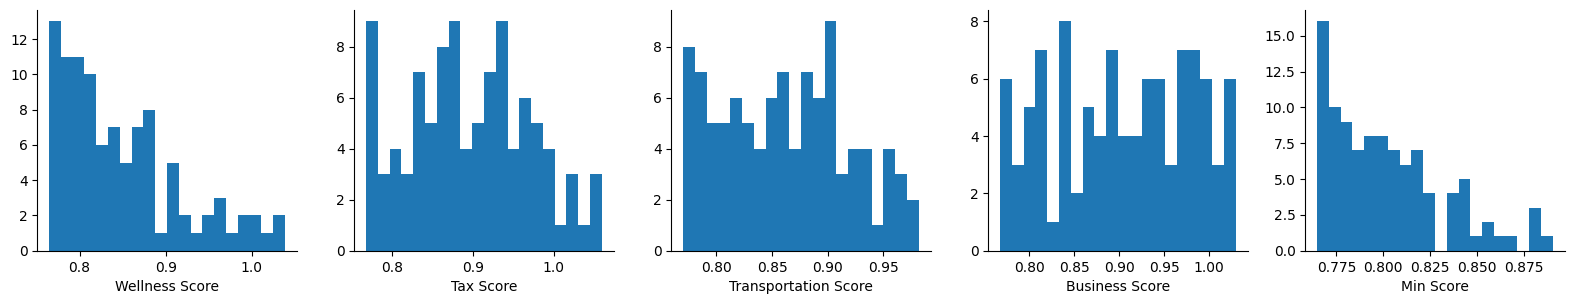

<Figure size 640x480 with 0 Axes>

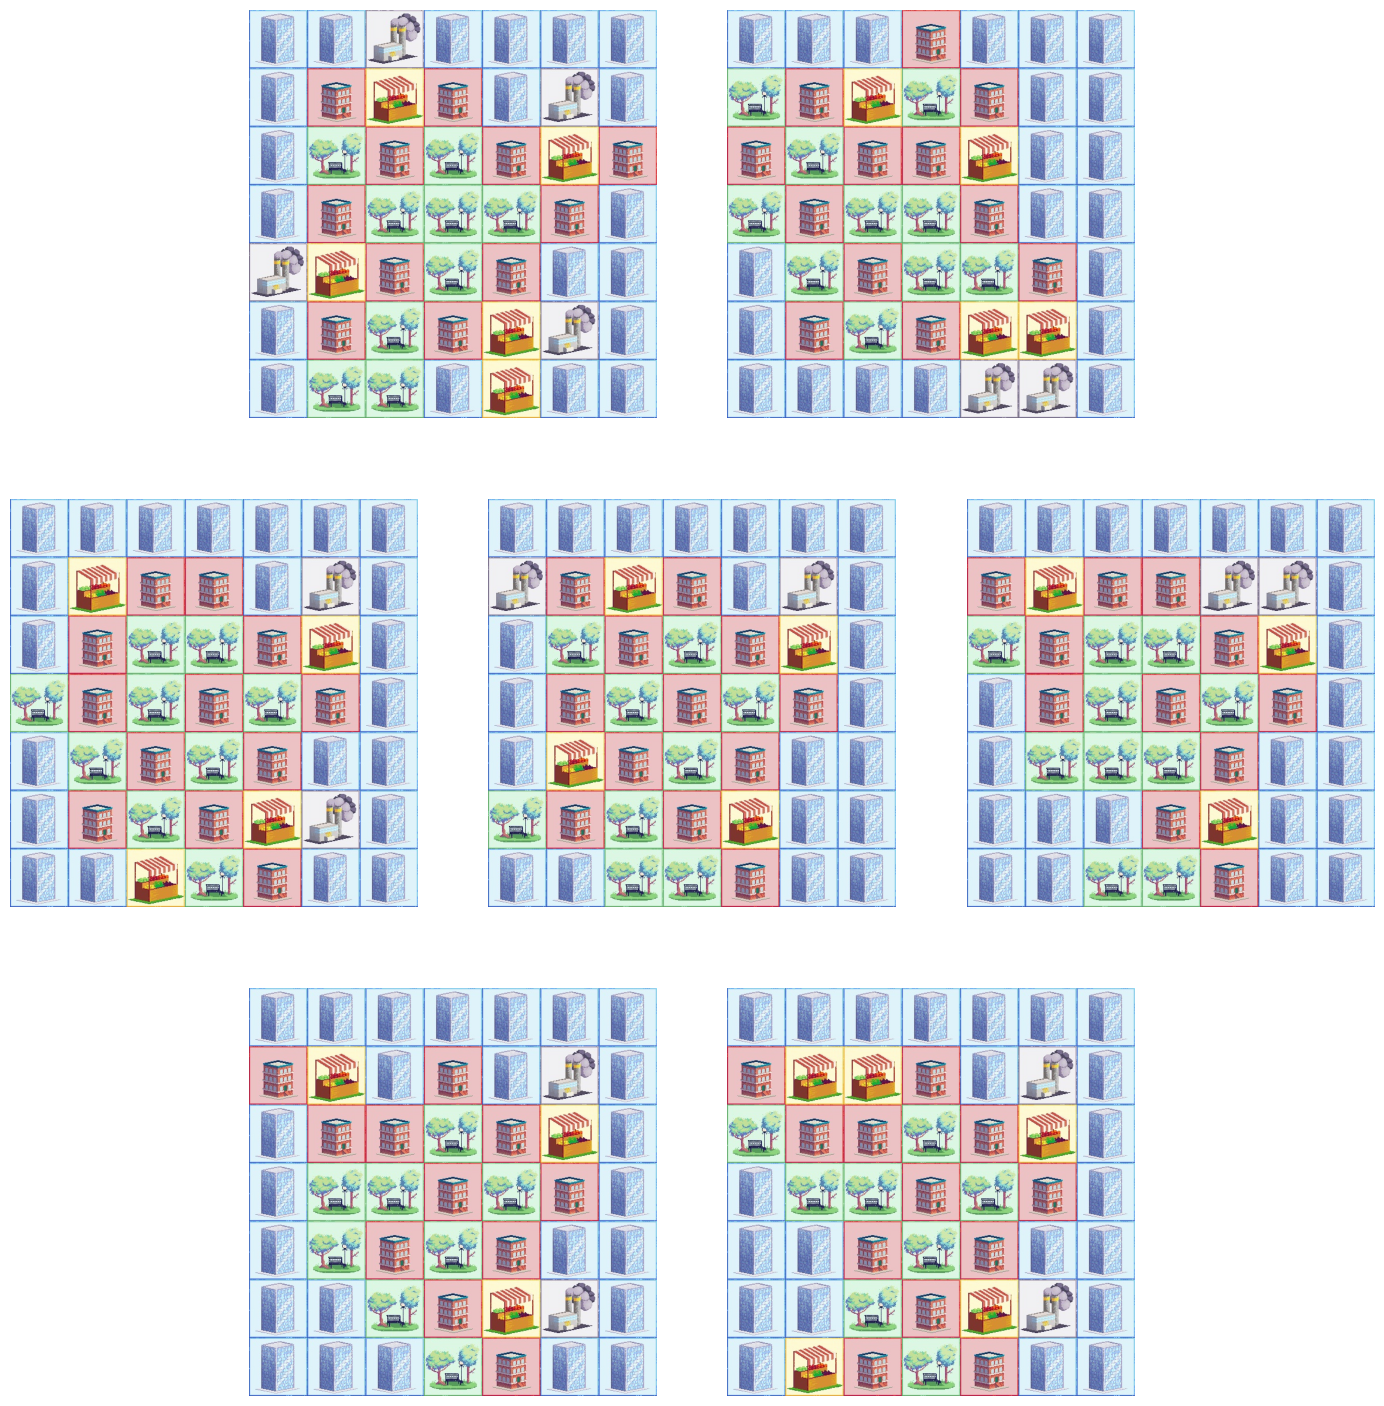

In [65]:
# TODO pick new grids if these are invalid, find a better way to pick grids
final_prediction_array = np.stack(all_predictions).T #stack the predictions
min_predictions = np.min(final_prediction_array, axis=1) #minimum advisor score (as predicted)
valid_grids = np.sum(min_predictions>0.75) #number of valid grids (as predicted)
top_100_indices = np.argpartition(min_predictions, -100)[-100:] #indices of top 100 designs (as sorted by minimum advisor score)
top_100_grids = grids[top_100_indices] #get the top 100 grids

print(f"Number of valid grids (as predicted): {valid_grids}")
if valid_grids >= 100:
    score = diversity_score(top_100_grids)
    print(f"Current diversity score: {score:.4f}")

    best_submission = np.load("submission.npy")
    loaded_score = diversity_score(best_submission)
    if score > loaded_score:
        final_submission = grids[top_100_indices].astype(int)
        # id = np.random.randint(1e8, 1e9-1)
        # np.save(f"{id}.npy", final_submission) # uncomment this for real submission
        np.save(f"submission.npy", final_submission) 
        print(f"Score improved! Previous best: {loaded_score:.4f}")
        print("Submission saved")
    elif score <= loaded_score:
        print(f"No improvement. Previous best: {loaded_score:.4f}")
else:
    print("Not enough valid grids found")

plot_ratings_histogram(final_prediction_array[top_100_indices], withmin=True) #plot histograms of top 100 designs
plot_n_grids(top_100_grids[-7:])
